# Python Lab 02: Orthogonalization Methods
## Francesco Della Santa, Computational Linear Algebra for Large Scale Problems, Politecnico di Torino

In this lesson, we will implement the (Modified) *Gram-Schmidt* method, the *Givens* method and the *House-
holder* method.

In [1]:
# ***** ATTENTION! *****
# If you want that the "%matplotlib widget" works, you need the package ipympl (pip install ipympl)
#
#
# MATPLOTLIB INTERACTIVE VISUALIZATION. REMOVE (OR COMMENT) IF YOU NEED TO PRINT THE NOTEBOOK AS A PDF, SOMETIMES IT DOES NOT WORK WELL...
%matplotlib widget
#
#

from IPython.display import display  # to display variables in a "nice" way
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from testmatrices import A1, b1, Ab1

## The Gram-Schmidt Method

Given an invertible square matrix $X\in\mathbb{R}^{n\times n}$, the Gram-Schmidt (GS) method compute two matrices, $Q, R \in\mathbb{R}^{n\times n}$, such that:
- $Q$ is orthogonal (i.e., $QQ^\top = \mathbb{I}_n = Q^{\top}Q$);
- The columns $\{\boldsymbol{q}_1,\ldots ,\boldsymbol{q}_n\}$ of $Q$ are an orthonormal base of the space $\langle \boldsymbol{x}_1,\ldots ,\boldsymbol{x}_n\rangle$ generated by the columns of $X$ (obvious if $X$ is square, but not if we considere the "extended case" $X\in\mathbb{R}^{m\times n}$, $m > n$);
- $R\in\mathbb{R}^{n\times n}$ upper triangular;
- $QR=X$.


#### Description of the GS Method

The idea of the GS method is to *build* iteratively the columns of $Q$ from the columns of $X$. In particular, we compute the column $\boldsymbol{q}_j$ as the column $\boldsymbol{x}_j$ from which we subtract the previous columns of $Q$ multiplied by their projection onto $\boldsymbol{x}_j$ (because we want orthogonal columns for $Q$); then, we normalize the result of this operation. The element $r_{ij}$, with $i< j$, are the projections of $\boldsymbol{q}_i$ on $\boldsymbol{x}_j$, while $r_{jj}$ is the norm of $\boldsymbol{q}_j$ *before the normalization step*.

From a "pseudocode point-of-view":
1. **for** $j=1,\ldots , n$ **do:**
    1. $\boldsymbol{q}_j\gets \boldsymbol{x}_j - \sum_{i=1}^{j-1}(\boldsymbol{x}_j,\boldsymbol{q}_i) \boldsymbol{q}_i$, where$(\boldsymbol{x}_j,\boldsymbol{q}_i)$ becomes $r_{ij}$;
    1. $\boldsymbol{q}_j\gets \frac{\boldsymbol{q}_j}{||\boldsymbol{q}_j||}$, where $||\boldsymbol{q}_j||$ becomes $r_{jj}$.

#### Exercise 1: GS Method

Complete the function in the following cell, such that it performs the GS method for any square matrix. The function must return not only $Q$ and $R$, but also the following norms representing the quality of the outputs:
- $||\mathbb{I}_n - QQ^\top||$;
- $||Q^\top X - R||$.

**Suggestions:** look at the help of the function np.*linalg*.**norm** to compute the norm of an array.

In [2]:
def gramschmidt(X):
    """
    Function that performs the Gram-Schmidt method for a given square Matrix (changing the code is generalizable to
    rectangular matrices)
    The matrix must have full rank.
    :param X: square matrix represented as 2D-array object (numpy ndarray);
    :return Q: 2D-array (orthogonal matrix) 
    :return R: 2D-array (upper triangle matrix).
    :return Qqual: norm ||In - Q @ Q.T||
    :return QRqual: norm ||Q.T @ X - R||
    """

    m, n = X.shape # dimensioni della matrice di input
    
    if m != n:
        print('MATRIX IS NOT SQUARE!')
        return None, None, None, None
    
    # Initialization of the matrices
    R = np.zeros((m,n)) 
    Q = np.zeros((m,n)) 

    # primo vettore
    R[0, 0] = np.linalg.norm(X[:,0]) # norma della prima colonna
    Q[:, 0] = X[:, 0].copy() / R[0,0] # normalizzo la prima colonna per ottenere il primo vettore ortonormale

    for j in range(1, n): # ciclo sulle colonne successive da ortogonalizzare
        Q[:,j] = X[:,j].copy() # initialize comulmn j of Q # copio la j colonna da proiettare
        
        for i in range(0, j): # ciclo sugli indici delle righe
            R[i,j] = X[:,j] @ Q[:,i] # calcolo il coefficiente di proiezione
            Q[:, j] -= R[i,j] * Q[:,i] # sottraggo la componente lungo Q[:,i]
            
        R[j, j] = np.linalg.norm(Q[:,j]) # norma del vettore residuo
        Q[:,j] = Q[:,j]/R[j,j] # normalizzo
        
    Qqual = np.linalg.norm(np.identity(n) - Q @ Q.T) # misura di ortogonalità, dovrebbe essere vicino a zero 
    
    QRqual = np.linalg.norm(Q.T @ X - R)  # verifica fattorizzazione X=QR e dovrebbe essere vicino a zero

    return Q, R, Qqual, QRqual

In [3]:
# GRAM-SCHMIDT METHOD TEST

print('********** Running GS on A1...')
Q, R, Qqual, QRqual = gramschmidt(A1)
print('')

print('********** Matrix Q of A1 **********')
print(Q)
print('')
print(f'********** "Orthogonal Quality" of Q: {Qqual}')
print('')

print('********** Matrix R of A1 **********')
print(R)
print('')
print(f'********** "Factorization Quality" of Q @ R: {QRqual}')
print('')

print('********** Running GS on Ab1...')
_, _, _, _ = gramschmidt(Ab1)

********** Running GS on A1...

********** Matrix Q of A1 **********
[[ 0.56849154 -0.17525212 -0.12047555 -0.79472618]
 [ 0.52438819 -0.06324392 -0.69079723  0.4937777 ]
 [ 0.41114502  0.86648332  0.27646146  0.06111864]
 [ 0.48248747 -0.46313449  0.65715591  0.34764694]]

********** "Orthogonal Quality" of Q: 5.9991167036271005e-15

********** Matrix R of A1 **********
[[ 1.63271866  0.91377811  1.11733762  1.39602848]
 [ 0.          0.56653816 -0.02404157  0.0179053 ]
 [ 0.          0.          0.53255251  0.41340652]
 [ 0.          0.          0.          0.15013171]]

********** "Factorization Quality" of Q @ R: 5.1989569731516746e-15

********** Running GS on Ab1...
MATRIX IS NOT SQUARE!


### The Modified GS Method

The **Modified Gram-Schmidt** method is introduced for numerical applications because, in finite arithmetic, it is more stable than the classic method.

In exact arithmetic, the Modified GS method returns the same result of the GS method.

The Modified GS method, changes the operations in this way:
1. **for** $j=1,\ldots , n$ **do:**
    1. $\boldsymbol{q}_j\gets \boldsymbol{q}_j - (\boldsymbol{q}_j,\boldsymbol{q}_i) \boldsymbol{q}_i$, iteratively for each $i=1,\ldots, j-1$, where$(\boldsymbol{q}_j,\boldsymbol{q}_i)$ becomes $r_{ij}$;
    1. $\boldsymbol{q}_j\gets \frac{\boldsymbol{q}_j}{||\boldsymbol{q}_j||}$, where $||\boldsymbol{q}_j||$ becomes $r_{jj}$.

#### Exercise 2: Modified GS Method

Complete the function in the following cell, such that it performs the Modified GS method for any square matrix.

In [4]:
def mod_gramschmidt(X):
    """
    Function that performs the Modified Gram-Schmidt method for a given square Matrix (changing the code is
    generalizable to rectangular matrices)
    The matrix must have full rank.
    :param X: square matrix represented as 2D-array object (numpy ndarray);
    :return Q: 2D-array (orthogonal matrix) 
    :return R: 2D-array (upper triangle).
    :return Qqual: norm ||In - Q @ Q.T||
    :return QRqual: norm ||Q.T @ X - R||
    """

    m, n = X.shape
    
    # verifico la shape
    if m != n:
        print('MATRIX IS NOT SQUARE!')
        return None, None, None, None

    # inizializzo R e Q
    R = np.zeros((n,n))  
    Q = np.zeros((m,n))  

    # primo vettore
    R[0, 0] = np.linalg.norm(X[:,0]) # calcolo la norma della prima colonna 
    Q[:, 0] = X[:, 0].copy() / R[0,0] # normalizzo

    for j in range(1, n):
        Q[:,j] = X[:,j].copy()
        
        for i in range(0, j):
            # ogni volta metto via la componente lungo il già ottenuto q_i, aggiornando il residuo. 
            # È più stabile numericamente del Gram–Schmidt classico.
            R[i,j] = Q[:,j] @ Q[:,i]
            Q[:, j] -= (R[i,j])*Q[:,i]
            
        R[j, j] = np.linalg.norm(Q[:,j]) # norma del vettore residuo
        Q[:,j] = Q[:,j]/R[j,j] # normalizzo
        
    Qqual = np.linalg.norm(np.identity(n) - Q @ Q.T)  
    
    QRqual = np.linalg.norm(Q.T @ X - R) 

    return Q, R, Qqual, QRqual

In [5]:
# MODIFIED GRAM-SCHMIDT METHOD TEST

print('********** Running GS on A1...')
Q, R, Qqual, QRqual = mod_gramschmidt(A1)
print('')

print('********** Matrix Q of A1 **********')
print(Q)
print('')
print(f'********** "Orthogonal Quality" of Q: {Qqual}')
print('')

print('********** Matrix R of A1 **********')
print(R)
print('')
print(f'********** "Factorization Quality" of Q @ R: {QRqual}')
print('')

print('********** Running GS on Ab1...')
_, _, _, _ = mod_gramschmidt(Ab1)

********** Running GS on A1...

********** Matrix Q of A1 **********
[[ 0.56849154 -0.17525212 -0.12047555 -0.79472618]
 [ 0.52438819 -0.06324392 -0.69079723  0.4937777 ]
 [ 0.41114502  0.86648332  0.27646146  0.06111864]
 [ 0.48248747 -0.46313449  0.65715591  0.34764694]]

********** "Orthogonal Quality" of Q: 1.5710517281947847e-15

********** Matrix R of A1 **********
[[ 1.63271866  0.91377811  1.11733762  1.39602848]
 [ 0.          0.56653816 -0.02404157  0.0179053 ]
 [ 0.          0.          0.53255251  0.41340652]
 [ 0.          0.          0.          0.15013171]]

********** "Factorization Quality" of Q @ R: 2.722131029758772e-15

********** Running GS on Ab1...
MATRIX IS NOT SQUARE!


## The Givens Method

The Givens (G) method takes into account the rotation matrices $G((h, k);X)$ that **set to zero** the $(h, k)$-th element of the matrix returned by the product $G((h,k);X) \, X$. Therefore, the Givens method consists in *setting to zero, one by one, all the elements under the diagonal* using the rotation matrices and, at the same time, obtaining an orthogonal matrix.

More precisely, given a square matrix $X\in\mathbb{R}^{n\times n}$, the method computes iteratively a matrix $Q$, through a product of rotation matrices, such that:
- $Q$ is orthogonal (i.e., $QQ^\top = \mathbb{I}_n = Q^{\top}Q$);
- The columns $\{\boldsymbol{q}_1,\ldots ,\boldsymbol{q}_n\}$ of $Q$ are an orthonormal base of the space $\langle \boldsymbol{x}_1,\ldots ,\boldsymbol{x}_n\rangle$ generated by the columns of $X$;
- $QX =: R\in\mathbb{R}^{n\times n}$ is an upper triangular matrix;

**N.B.:** if we want to preserve the same notation of the GS method, then G computes the matrix $Q^{\top}$ (such that $R=Q^\top X$ and, therefore, $QR=X$).

#### Rotation Matrices of the Givens Method (Case $h>k$)

The elements elements $g_{ij}:=G_{ij}((h,k); X)$ of a *Givens matrix* are defined as
$$
g_{ij}=
\begin{cases}
1\,,\quad & \text{if }i=j\neq h,k\\
c\,,\quad & \text{if }i=j= h,k\\
s\,,\quad & \text{if }i=k, j=h\\
-s\,,\quad & \text{if }i=h, j=k\\
0\,,\quad & \text{otherwise}\\
\end{cases}\,,
$$
where
$$
c:=\frac{x_{kk}}{\sqrt{x_{kk}^2 + x_{hk}^2}}\,,\quad s:=\frac{x_{hk}}{\sqrt{x_{kk}^2 + x_{hk}^2}}\,.
$$

Then, for the case $h>k$, the matrix has the following aspect:
$$
G((h,k);X) = 
\begin{bmatrix}
1 &    &    &    &    &    &    &    &    &    &    \\
    & \ddots &    &    &    &    &    &    &    &    &    \\
    & \quad & 1 &    &    &    &    &    &    &    &    &    \\
    &    &    & c & \cdots &    & \cdots & s &    &    &    \\
    &    &    & \vdots & 1 &    &    & \vdots &    &    &    \\
    &    &    &    &    & \ddots &    &    &    &    &    \\
    &    &    & \vdots &    &    & 1 & \vdots &    &    &    \\
    &    &    & -s & \cdots &    & \cdots & c &    &    &    \\
    &    &    &    &    &    &    &    & 1 &    &    &    \\
    &    &    &    &    &    &    &    &    & \ddots &    \\
    &    &    &    &    &    &    &    &    &    & 1 \\
\end{bmatrix}\,.
$$

#### Description of the G Method

From a "pseudocode point-of-view", given a square matrix $X\in\mathbb{R}^{n\times n}$, the algorithm performs the following operations:
1. $R\gets X$;
1. *initialization of* $Q$ (**exercise**)
1. **for** $k=1,\ldots ,n$ and $h=k+1, \ldots, n$ **do:** ($k$ for columns, $h$ for "under-diag." rows)
    1. $G\gets G((h, k); R)$
    1. *update* $Q$ (**exercise**)
    1. $R\gets GR$
1. **return** $Q$, $R$

#### Exercise 3: Givens Matrix

Complete the function in the following cell, such that it computes the Givens matrix $G((h,k); X)\in\mathbb{R}^{n\times n}$ for any square matrix $X\in\mathbb{R}^{n\times n}$ and any $h,k\in\{1,\ldots ,n\}$.

**Suggestions:** look at the help of the function np.**hypot** to compute the denominators of $c$ and $s$. Indeed, this function is better (from a numerical point of view) than using np.**sqrt** on the sum of $x_{kk}^2$ and $x_{hk}^2$.

In [15]:
def givens_mat(X, h, k):
    """
    Function that compute the Givens matrix for a given square matrix X and with respect to row h and column k
    :param X: square matrix represented as 2D-array object (numpy ndarray);
    :param h: integer value in the range of the number of X's rows;
    :param k: integer value in the range of the number of X's columns;
    :return G: the Givens matrix as 2D-array object (numpy ndarray).
    """
    
    m, n = X.shape  # ottiene numero di righe (m) e colonne (n)
    
    if m != n: # controlla se la matrice è quadrata
        print('MATRIX IS NOT SQUARE!')
        return None
    
    # d (denominator of both c and s) can be written as:
    # d = np.sqrt(X[k, k]**2 + X[h, k]**2)
    # But is better (due to numerical problems) to use the hypot function.
    d = np.hypot(X[k,k], X[h,k]) # calcolo del denominatore per c e s in modo stabile numericamente
    # equivalente a sqrt(X[k,k]**2 + X[h,k]**2)
    
    c = X[k,k] / d  # coefficiente coseno (rotazione)
    s = X[h,k] / d  # coefficiente seno (rotazione)

    G = np.identity(n)
    G[h,h] = c
    G[k,k] = c
    G[h,k] = -s
    G[k,h] = s

    return G # matrice di Givens 

In [16]:
# GIVENS MATRIX TEST

h, k = 1, 0
tolG = 1e-8

G_hk = givens_mat(A1, h, k)
G_hk_A1 = G_hk @ A1
G_hk_A1_tol = G_hk_A1.copy()
G_hk_A1_tol[abs(G_hk_A1_tol) < tolG] = 0

print('********** h, k **********')
print(f'h = {h} (row index)')
print(f'k = {k} (column index)')
print('')

print('********** Matrix G_hk **********')
print(G_hk)
print('')

print('********** Matrix G_hk @ A1 ((h,k)-th element should be zero) **********')
print('********** Original G_hk @ A1')
print(G_hk_A1)
print('')
print('********** "Rounded" G_hk @ A1')
print(G_hk_A1_tol)
print('')

********** h, k **********
h = 1 (row index)
k = 0 (column index)

********** Matrix G_hk **********
[[ 0.73504392  0.6780195   0.          0.        ]
 [-0.6780195   0.73504392  0.          0.        ]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]]

********** Matrix G_hk @ A1 ((h,k)-th element should be zero) **********
********** Original G_hk @ A1
[[ 1.26276366e+00  6.09452835e-01  5.71696014e-01  8.08954398e-01]
 [ 2.23802408e-17  4.09818378e-02 -2.28649891e-01 -3.94626698e-02]
 [ 6.71284152e-01  8.66591190e-01  5.85786433e-01  7.12951623e-01]
 [ 7.87766294e-01  1.78503125e-01  9.00205908e-01  9.89139055e-01]]

********** "Rounded" G_hk @ A1
[[ 1.26276366  0.60945283  0.57169601  0.8089544 ]
 [ 0.          0.04098184 -0.22864989 -0.03946267]
 [ 0.67128415  0.86659119  0.58578643  0.71295162]
 [ 0.78776629  0.17850312  0.90020591  0.98913906]]



#### Exercise 4: Givens Method

Complete the function in the following cell, such that it performs the Givens method for any square matrix. The function must return not only $Q$ and $R$, but also the following norms representing the quality of the outputs:
- $||\mathbb{I}_n - QQ^\top||$;
- $||Q X - R||$.

**Suggestions:** exploit the **givens_mat** function of the previous exercise.

In [17]:
def givens(X):
    """
    Function that performs the Givens method for a given square matrix X.
    :param X: square matrix represented as 2D-array object (numpy ndarray);
    :return Q: 2D-array (orthogonal matrix) 
    :return R: 2D-array (upper triangle).
    :return Qqual: norm ||In - Q @ Q.T||
    :return QRqual: norm ||Q @ X - R||
    """
    
    m, n = X.shape

    # verifica della dimensione della matrice
    if m != n:
        print('MATRIX IS NOT SQUARE!')
        return None, None, None, None
    
    # Initialization of the matrices
    R = X.copy()  # R diventerà triangolare superiore tramite rotazioni
    Q = np.identity(n)  # Q accumulerà le rotazioni in modo da diventare la Q ortogonale

    # ciclo sulle colonne: per ogni colonna j voglio azzerare gli elementi sotto la diagonale
    for j in range(n):
        for i in range(j+1, m): # per ogni riga i sotto la diagonale (i = j+1 ... m-1)
            G = givens_mat(R, i, j) # # costruisco la matrice di Givens che annulla R[i, j]
            Q = Q@G.T # aggiorno Q in modo che alla fine Q @ R == X (Q è ortogonale)
            # nota: uso Q = Q @ G.T per accumulare le rotazioni in modo che Q sia la Q "classica"
            # (se invece usassi Q = G @ Q, allora Q conterrebbe Q^T)
            R = G@R # applico la rotazione a R: ora l'elemento R[i,j] sarà (quasi) zero
            
            
    Qqual = np.linalg.norm(np.identity(n) - Q @ Q.T)  
    
    QRqual = np.linalg.norm(Q.T @ X - R)

    return Q, R, Qqual, QRqual

In [18]:
# GIVENS METHOD TEST

print('********** Running G on A1...')
print('')

Q, R, Qqual, QRqual = givens(A1)

tolR = 1e-8
Rtol = R.copy()
Rtol[abs(Rtol) < tolR] = 0



print('********** Matrix Q of A1 **********')
print(Q)
print('')
print(f'********** "Orthogonal Quality" of Q: {Qqual}')
print('')

print('********** Matrix R of A1 **********')
print('********** Original R')
print(R)
print('')
print('********** "Rounded" R')
print(Rtol)
print('')

print(f'********** "Factorization Quality" of Q.T @ R: {QRqual}')
print('')

print('********** Running G on Ab1...')
_, _, _, _ = givens(Ab1)

********** Running G on A1...

********** Matrix Q of A1 **********
[[ 0.56849154 -0.17525212 -0.12047555 -0.79472618]
 [ 0.52438819 -0.06324392 -0.69079723  0.4937777 ]
 [ 0.41114502  0.86648332  0.27646146  0.06111864]
 [ 0.48248747 -0.46313449  0.65715591  0.34764694]]

********** "Orthogonal Quality" of Q: 3.405525399808835e-16

********** Matrix R of A1 **********
********** Original R
[[ 1.63271866e+00  9.13778111e-01  1.11733762e+00  1.39602848e+00]
 [ 4.99688153e-17  5.66538161e-01 -2.40415658e-02  1.79052971e-02]
 [-6.24385168e-17 -4.24745400e-18  5.32552513e-01  4.13406519e-01]
 [-8.69191610e-18  1.24008185e-18  8.49464925e-21  1.50131706e-01]]

********** "Rounded" R
[[ 1.63271866  0.91377811  1.11733762  1.39602848]
 [ 0.          0.56653816 -0.02404157  0.0179053 ]
 [ 0.          0.          0.53255251  0.41340652]
 [ 0.          0.          0.          0.15013171]]

********** "Factorization Quality" of Q.T @ R: 2.3568361076514977e-16

********** Running G on Ab1...
MATRI

## The Householder Method

The Householder (H) method takes into account a family of reflection matrices such that, for any vector $\boldsymbol{x}\in\mathbb{R}^m$, the reflection matrix w.r.t. $\boldsymbol{x}$ is a square matrix $P_{\boldsymbol{x}}\in\mathbb{R}^{m\times m}$ such that
$$
P_{\boldsymbol{x}}\boldsymbol{x} = 
\begin{bmatrix}
-\sigma\\
0\\
\vdots\\
0
\end{bmatrix}\,,
$$
where $\sigma = \mathrm{sign}(x_1)||\boldsymbol{x}||$.

Then, with the same idea of the Givens method, iteratively we **set to zero** all the elements under the diagonal of the given input square matrix $X\in\mathbb{R}^{n\times n}$, one column by one column, using the reflection matrices and, at the same time, obtaining an orthogonal matrix $Q$.

More precisely, given a square matrix $X\in\mathbb{R}^{n\times n}$, the method computes iteratively a matrix $Q\in\mathbb{R}^{n\times n}$, through a product of matrices with a block that is a reflection matrix in $\mathbb{R}^{m\times m}$. Specifically, the method returns $Q, R\in\mathbb{R}^{n\times n}$ such that:
- $Q$ is orthogonal (i.e., $QQ^\top = \mathbb{I}_n = Q^{\top}Q$);
- The columns $\{\boldsymbol{q}_1,\ldots ,\boldsymbol{q}_n\}$ of $Q$ are an orthonormal base of the space $\langle \boldsymbol{x}_1,\ldots ,\boldsymbol{x}_n\rangle$ generated by the columns of $X$;
- $QX =: R\in\mathbb{R}^{n\times n}$ is an upper triangular matrix;

**N.B.:** if we want to preserve the same notation of the GS method, then H (as G) computes the matrix $Q^{\top}$ (such that $R=Q^\top X$ and, therefore, $QR=X$).

#### Reflection Matrices of the Householder Method

Given a vector $\boldsymbol{x}\in\mathbb{R}^m$ its Householder matrix $P_{\boldsymbol{x}}\in\mathbb{R}^{m\times m}$ is defined as
$$
P_{\boldsymbol{x}} = \mathbb{I}_m - 2 \bar{\boldsymbol{u}}\bar{\boldsymbol{u}}^\top\,,
$$
where 
$$
\bar{\boldsymbol{u}} = \frac{\boldsymbol{u}}{||\boldsymbol{u}||}
\quad \text{and}\quad
\boldsymbol{u}:= \boldsymbol{x} + \sigma\boldsymbol{e}_1 = \boldsymbol{x} + \mathrm{sign}(x_1)||\boldsymbol{x}||\boldsymbol{e}_1\,.
$$

**Few Details:** $P_{\boldsymbol{x}}\boldsymbol{x}$ is the reflection of the vector $\boldsymbol{x}$ w.r.t. the hyperplane orthogonal to the versor $\bar{\boldsymbol{u}}$.

#### Description of the H Method

From a "pseudocode point-of-view", given a square matrix $X\in\mathbb{R}^{n\times n}$, the algorithm performs the following operations:
1. $R\gets X$;
1. *initialization of* $Q$ (**exercise**)
1. **for** $j=1,\ldots ,n$ **do:** ($j$ for columns)
    1. $\boldsymbol{x}\gets R_{j:n, j}$ (sub-column of $j$-th column, elements "from the diagonal to the end")
    1. $P_j\gets \begin{bmatrix} \mathbb{I}_{n-j} & \boldsymbol{0} \\ \boldsymbol{0} & P_{\boldsymbol{x}}\end{bmatrix}$ 
    1. *update* $Q$ (**exercise**)
    1. $R\gets P_jR$
1. **return** $Q$, $R$

#### Exercise 5: Householder Matrix

Complete the function in the following cell, such that it computes the Housholder matrix $P_{\boldsymbol{x}}\in\mathbb{R}^{m\times m}$ for any vector $\boldsymbol{x}\in\mathbb{R}^{m}$.

**Suggestions:** look at the help of the function np.**sign** to compute $\sigma$.

In [19]:
def householder_mat(x):
    """
    Function that compute the reflection matrix of the Householder method for a given vector x.
    :param x: vector that can be given both as 1D-array object and 2D-array column/row object (numpy ndarray);
    :return Px: Householder reflection matrix as 2D-array object (numpy ndarray).
    """
    
    # Reshaping the input as a column vector (if it is 1D-array or row 2D-array)... actually it works even if it is a non-vectot matrix...
    v = x.reshape(x.size, 1)
    
    sigma = np.sign(v[0][0]) * np.linalg.norm(v) 

    # Computation of u (versor)
    # prima alternativa
    # e1 = zeros(v.size, 1)
    # e1[0][0] = 1
    # u = v + sigma * e1
    u = v + sigma * np.eye(v.size, 1) # se uso size come dimensione della riga allora mi mette già il prodotto tipo 4*1=4 come dimensione della riga
    u_versor = u / np.linalg.norm(u) # costruisco il versore e quindi normalizzo

    # Computation of the reflection matrix
    Px = np.identity(v.size) - 2*(u_versor*u_versor.T) # this product is a matrix 

    return Px

In [20]:
# HOUSEHOLDER MATRIX TEST

tolH = 1e-8

Pb1 = householder_mat(b1)
Pb1b1 = Pb1 @ b1
Pb1b1_tol = Pb1b1.copy()
Pb1b1_tol[abs(Pb1b1_tol) < tolH] = 0

print('********** Matrix Pb1 **********')
print(Pb1)
print('')

print('********** Matrix Pb1 @ b1 **********')
print('********** Original Pb1 @ b1')
print(Pb1b1)
print('')
print('********** "Rounded" Pb1 @ b1')
print(Pb1b1_tol)
print('')

********** Matrix Pb1 **********
[[-0.49130121 -0.39353456 -0.54759611 -0.55126416]
 [-0.39353456  0.89615146 -0.14450333 -0.14547128]
 [-0.54759611 -0.14450333  0.79892627 -0.20242062]
 [-0.55126416 -0.14547128 -0.20242062  0.79622347]]

********** Matrix Pb1 @ b1 **********
********** Original Pb1 @ b1
[[-5.18011974]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]]

********** "Rounded" Pb1 @ b1
[[-5.18011974]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]]



#### Exercise 4: Householder Method

Complete the function in the following cell, such that it performs the Householder method for any square matrix. The function must return not only $Q$ and $R$, but also the following norms representing the quality of the outputs:
- $||\mathbb{I}_n - QQ^\top||$;
- $||Q X - R||$.

**Suggestions:** exploit the **householder_mat** function of the previous exercise.


In [21]:
def householder(X):
    """
    Function that performs the Householder method for a given square matrix X.
    :param X: square matrix represented as 2D-array object (numpy ndarray);
    :return Q: 2D-array (orthogonal matrix) 
    :return R: 2D-array (upper triangle).
    :return Qqual: norm ||In - Q @ Q.T||
    :return QRqual: norm ||Q @ X - R||
    """
    
    m, n = X.shape # ottiene dimensioni della matrice X
    
    if m != n:  # controlla se X è matrice quadrata
        print('MATRIX IS NOT SQUARE!')
        return None, None, None, None
    
    # Initialization of the matrices
    R = X.copy()  # R diventerà triangolare superiore tramite rotazioni
    Q = np.identity(n)  # Q accumulerà le riflessioni in modo da diventare la Q ortogonale

    for j in range(n): # ciclo sulle colonne
        # la matrice di householder viene calcolata per il vettore di R che parte della riga j in giù e prende tutta la colonna j
        # quindi ad ogni ciclo la matrice di householder avrà una dimensione diversa
        # per questo mi serve una matrice Pj dove salvo tutti gli aggiormamenti della matrice Px
        Px = householder_mat(R[j:,j]) # calcola matrice di Householder per annullare elementi sotto la diagonale
        Pj = np.identity(n)
        # inserisco Px nel blocco inferiore destro (agisce solo da j in poi)
        Pj[j:, j:] = Px # metto in posizione dalla riga j in giù e dalla colonna j in avanti la matrice Px
        
        # update of the matrices
        R = Pj @ R # applica la riflessione a R (trasforma colonna j)
        Q = Pj @ Q # accumula la riflessione in Q (costruendo Q ortogonale)
    
    Qqual = np.linalg.norm(np.identity(n) - Q @ Q.T)  

    QRqual = np.linalg.norm(Q @ X - R) # non è più Q.T perchè in realtà nella mia Q c'è salavato il Q.T

    return Q, R, Qqual, QRqual

In [13]:
# HOUSEHOLDER METHOD TEST

print('********** Running H on A1...')
print('')

Q, R, Qqual, QRqual = householder(A1)

tolR = 1e-8
Rtol = R.copy()
Rtol[abs(Rtol) < tolR] = 0



print('********** Matrix Q of A1 **********')
print(Q)
print('')
print(f'********** "Orthogonal Quality" of Q: {Qqual}')
print('')

print('********** Matrix R of A1 **********')
print('********** Original R')
print(R)
print('')
print('********** "Rounded" R')
print(Rtol)
print('')

print(f'********** "Factorization Quality" of Q.T @ R: {QRqual}')
print('')

print('********** Running H on Ab1...')
_, _, _, _ = householder(Ab1)

********** Running H on A1...

********** Matrix Q of A1 **********
[[-0.56849154 -0.52438819 -0.41114502 -0.48248747]
 [-0.17525212 -0.06324392  0.86648332 -0.46313449]
 [-0.12047555 -0.69079723  0.27646146  0.65715591]
 [ 0.79472618 -0.4937777  -0.06111864 -0.34764694]]

********** "Orthogonal Quality" of Q: 8.155739877153469e-16

********** Matrix R of A1 **********
********** Original R
[[-1.63271866e+00 -9.13778111e-01 -1.11733762e+00 -1.39602848e+00]
 [ 1.79422275e-18  5.66538161e-01 -2.40415658e-02  1.79052971e-02]
 [ 8.01129690e-17 -8.89691766e-17  5.32552513e-01  4.13406519e-01]
 [ 1.03821601e-16 -1.31072495e-16  3.63573595e-17 -1.50131706e-01]]

********** "Rounded" R
[[-1.63271866 -0.91377811 -1.11733762 -1.39602848]
 [ 0.          0.56653816 -0.02404157  0.0179053 ]
 [ 0.          0.          0.53255251  0.41340652]
 [ 0.          0.          0.         -0.15013171]]

********** "Factorization Quality" of Q.T @ R: 1.9916810759964278e-16

********** Running H on Ab1...
MATRI

## A Comparison Between Methods


Let $V_n(\boldsymbol{x})\in\mathbb{R}^{m\times n}$ be the *Vandermonde* matrix of order $n$ w.r.t. the vector $\boldsymbol{x}\in\mathbb{R}^m$, i.e.:
$$
V_n(\boldsymbol{x}) = 
\begin{bmatrix}
x_1^0 & \cdots & x_1^{n-1} \\
\vdots &  & \vdots \\
x_m^0 & \cdots & x_m^{n-1} \\
\end{bmatrix}
$$

Considering only square Vandermonde matrices (i.e., $m=n$), study how the quality of the orthogonalization changes while increasing $n$ (and, consequently, the condition number $\kappa(V_n(\boldsymbol{x}))$). 

In particular, look at the quality measures returned by the methods and the corresponding plots.

#### Exercise 5: Methods and Performances

Complete the code in the following cell, such that it computes and illustrates how the norms $||\mathbb{I}_n - QQ^\top||$ and $||Q X - R||$ (or $||Q^{\top} X - R||$) changes with $n$

**Suggestions:** use the **vander** function for computing the Vandermonde matrix.


******* "ORTHOGONAL QUALITY" OF Q *******


,GS,mGS,G,H
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,5.987099e-16,5.987099e-16,3.156082e-16,9.127912e-16
4,4.007648e-14,3.012885e-14,4.307063e-16,1.315852e-15
8,6.531539e-05,4.830692e-11,8.086955e-16,1.269938e-15
16,6.486328e+00,5.029096e-01,2.483987e-15,3.033737e-15
32,2.256437e+01,3.397905e+00,5.005171e-15,6.635606e-15
64,5.396404e+01,4.822590e+00,1.010520e-14,1.531759e-14
128,1.184013e+02,6.028676e+00,2.016891e-14,4.268627e-14



******* "FACTORIZATION QUALITY" *******


,GS,mGS,G,H
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,7.043575e-16,7.043575e-16,0.000000e+00,0.000000e+00
4,1.127607e-13,1.286039e-13,1.006515e-15,1.168291e-15
8,8.626402e-06,6.780509e-10,2.581383e-14,2.976008e-14
16,2.678749e+02,2.340761e+03,8.839303e-12,9.329314e-12
32,1.193455e+09,7.458225e+08,4.665447e-07,4.965606e-07
64,2.325243e+18,1.003905e+18,1.081231e+03,6.660184e+02
128,2.693837e+39,1.071990e+38,3.376392e+22,9.662004e+22


Text(0.5, 0.98, 'ORTHOGONALIZATION QUALITY (LOG. SCALE)')

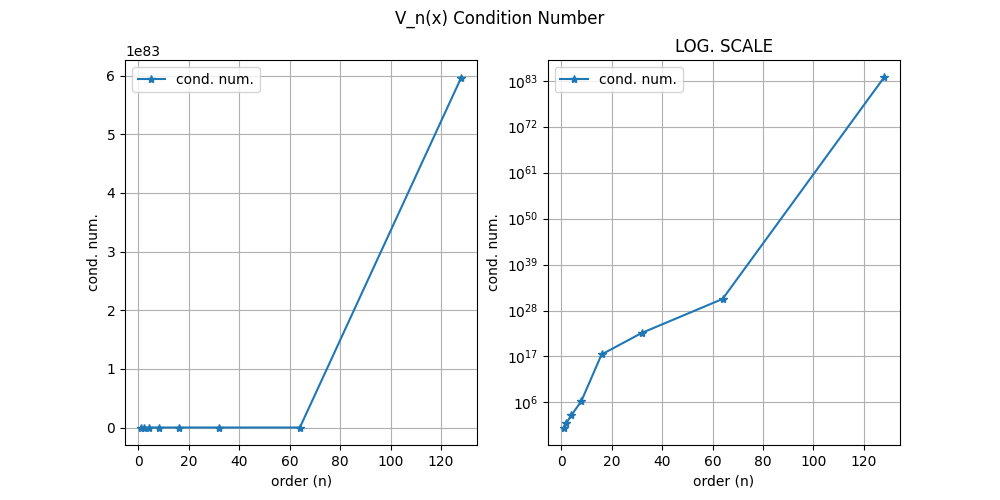

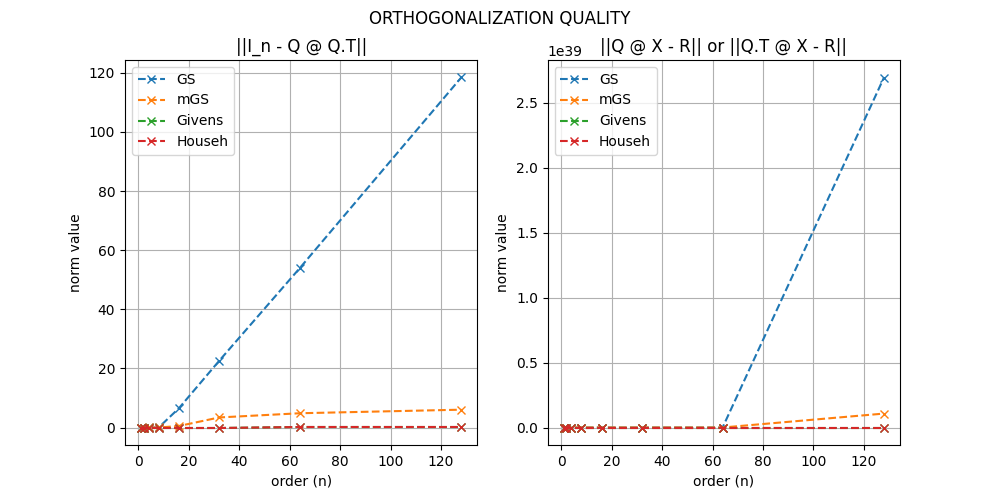

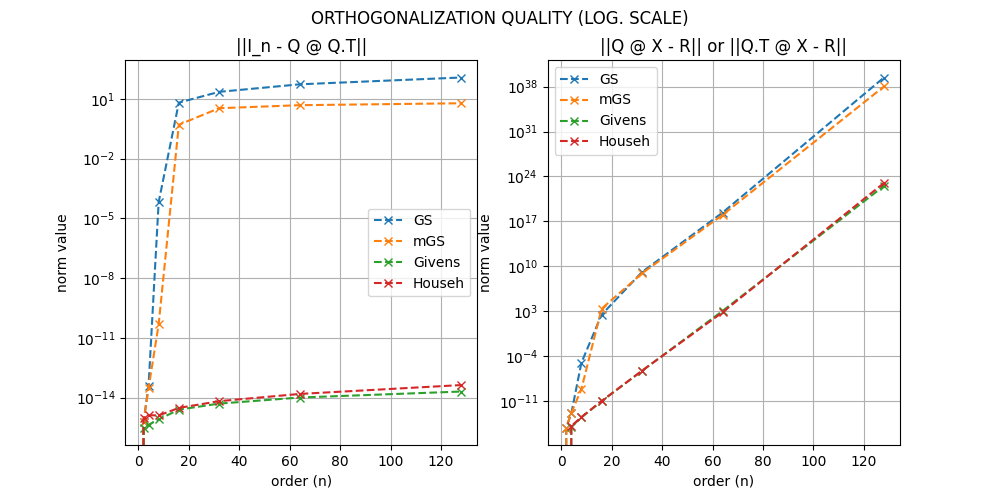

In [25]:
n_values = [2 ** i for i in range(8)] # ordini di test: 1,2,4,...,128 (2^0..2^7)

# vettore con valori uniformi in [0,2] di lunghezza max
x = 2 * np.random.rand(n_values[-1])  # Uniform random values in [0, 2]

# DataFrame per memorizzare le qualità (ortogonalità e fattorizzazione)
Qqual_df = pd.DataFrame(np.zeros((len(n_values), 4)), columns=['GS', 'mGS', 'G', 'H'], index=n_values)
QRqual_df = pd.DataFrame(np.zeros((len(n_values), 4)), columns=['GS', 'mGS', 'G', 'H'], index=n_values)

cond_values = [] # lista per i numeri di condizione delle Vandermonde

for n in n_values: # ciclo principale: costruisco V_n(x), applico i metodi
    # Select the first n elements of x for building the order-n Vandermonde matrix
    xn = x[:n] # prendo i primi n elementi di x
    V = np.vander(xn, increasing=True)   # costruisco la Vandermonde n×n con colonne [1, x, x^2, ...]
    
    cond_values.append(np.linalg.cond(V))  # numero di condizione di V

    # Compute the "quality norms" of the algorithms and store the results in the pandas DataFrame.
    # EXAMPLE for storing value in the pandas DataFrame for the case of GS method ("Qqual" norm):
    #     Qqual_df.loc[n, 'GS'] = Qqual_norm_GS

    # Gram-Schmidt classico
    Q_gs, R_gs, Qqual_gs, QRqual_gs = gramschmidt(V)  
    Qqual_df.loc[n, 'GS'] = Qqual_gs                   # salvo ||I - Q Q^T||
    QRqual_df.loc[n, 'GS'] = QRqual_gs                 # salvo ||Q X - R|| o ||Q.T X - R|| (fornita)

    # Modified Gram-Schmidt
    Q_mgs, R_mgs, Qqual_mgs, QRqual_mgs = mod_gramschmidt(V)  # chiamo la tua funzione mGS
    Qqual_df.loc[n, 'mGS'] = Qqual_mgs                       # salvo qualità ortogonalità
    QRqual_df.loc[n, 'mGS'] = QRqual_mgs                     # salvo qualità fattorizzazione

    # Givens
    Q_giv, R_giv, Qqual_giv, QRqual_giv = givens(V)          # chiamo la tua funzione givens
    Qqual_df.loc[n, 'G'] = Qqual_giv                         # salvo qualità ortogonalità (Givens)
    QRqual_df.loc[n, 'G'] = QRqual_giv                       # salvo qualità fattorizzazione

    # Householder
    Q_h, R_h, Qqual_h, QRqual_h = householder(V)             # chiamo la tua funzione householder
    Qqual_df.loc[n, 'H'] = Qqual_h                           # salvo qualità ortogonalità (Householder)
    QRqual_df.loc[n, 'H'] = QRqual_h                         # salvo qualità fattorizzazione

# visualizzo i dataframe
print('******* "ORTHOGONAL QUALITY" OF Q *******')
display(Qqual_df) # tabella con ||I - Q Q^T|| per ogni metodo e ordine
print('')

print('******* "FACTORIZATION QUALITY" *******')
display(QRqual_df) # tabella con ||Q X - R|| (o ||Q.T X - R||) per ogni metodo e ordine
print('')


# ***************** FIGURE 0 ***************** (cond number: linear + log)
fig0, ax0 = plt.subplots(1, 2, figsize=(10,5))
ax0[0].plot(n_values, cond_values, '-*', label='cond. num.') # cond number (scala lineare)

ax0[1].plot(n_values, cond_values, '-*', label='cond. num.') # stessa curva a destra (log)

ax0[0].set_title('')
ax0[0].set_xlabel('order (n)') # etichetta asse x
ax0[0].set_ylabel('cond. num.') # etichetta asse y
ax0[0].grid() # griglia
ax0[0].legend() # legenda

ax0[1].set_title('LOG. SCALE')
ax0[1].set_xlabel('order (n)')
ax0[1].set_ylabel('cond. num.')
ax0[1].set_yscale('log')  # scala logaritmica sull'asse y per evidenziare la crescita
ax0[1].grid()
ax0[1].legend()

fig0.suptitle('V_n(x) Condition Number') 


# ***************** FIGURE 1 ***************** (qualità: scala lineare)
fig1, ax1 = plt.subplots(1, 2, figsize=(10, 5))

# sinistra: ortogonalità in scala lineare per tutti i metodi
ax1[0].plot(n_values, Qqual_df['GS'], '--x', label='GS')      # GS classico
ax1[0].plot(n_values, Qqual_df['mGS'], '--x', label='mGS')    # Modified GS
ax1[0].plot(n_values, Qqual_df['G'], '--x', label='Givens')  # Givens
ax1[0].plot(n_values, Qqual_df['H'], '--x', label='Househ')  # Householder

# destra: qualità della fattorizzazione (lineare)
ax1[1].plot(n_values, QRqual_df['GS'], '--x', label='GS')
ax1[1].plot(n_values, QRqual_df['mGS'], '--x', label='mGS')
ax1[1].plot(n_values, QRqual_df['G'], '--x', label='Givens')
ax1[1].plot(n_values, QRqual_df['H'], '--x', label='Househ')

ax1[0].set_title('||I_n - Q @ Q.T||') # titolo sotto grafico a sx
ax1[0].set_xlabel('order (n)')
ax1[0].set_ylabel('norm value')
ax1[0].grid()
ax1[0].legend()

ax1[1].set_title('||Q @ X - R|| or ||Q.T @ X - R||') # titolo sotto grafico dx
ax1[1].set_xlabel('order (n)')
ax1[1].set_ylabel('norm value')
ax1[1].grid()
ax1[1].legend()

fig1.suptitle('ORTHOGONALIZATION QUALITY') 


# ***************** FIGURE 2 ***************** (qualità: scala logaritmica)
fig2, ax2 = plt.subplots(1, 2, figsize=(10, 5))

# sinistra: ortogonalità (scala log)
ax2[0].plot(n_values, Qqual_df['GS'], '--x', label='GS')
ax2[0].plot(n_values, Qqual_df['mGS'], '--x', label='mGS')
ax2[0].plot(n_values, Qqual_df['G'], '--x', label='Givens')
ax2[0].plot(n_values, Qqual_df['H'], '--x', label='Househ')

# destra: qualità fattorizzazione (scala log)
ax2[1].plot(n_values, QRqual_df['GS'], '--x', label='GS')
ax2[1].plot(n_values, QRqual_df['mGS'], '--x', label='mGS')
ax2[1].plot(n_values, QRqual_df['G'], '--x', label='Givens')
ax2[1].plot(n_values, QRqual_df['H'], '--x', label='Househ')

ax2[0].set_title('||I_n - Q @ Q.T||')
ax2[0].set_xlabel('order (n)')
ax2[0].set_ylabel('norm value')
ax2[0].set_yscale('log') # scala logaritmica per asse y
ax2[0].grid()
ax2[0].legend()

ax2[1].set_title('||Q @ X - R|| or ||Q.T @ X - R||')
ax2[1].set_xlabel('order (n)')
ax2[1].set_ylabel('norm value')
ax2[1].set_yscale('log') # scala logaritmica per asse y
ax2[1].grid()
ax2[1].legend()

fig2.suptitle('ORTHOGONALIZATION QUALITY (LOG. SCALE)') 